##Biomedical Image Processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio
import images


%matplotlib inline

###Load images
In this chapter, we'll work with sections of a computed tomography (CT) scan from The Cancer Imaging Archive. CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.

In [3]:
im = imageio.imread("images/chest.dcm")

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (2372, 3000)


###Metadata
ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

Patient demographics: name, age, sex, clinical information
Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)
Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

In [4]:
# Print the available metadata fields
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'AcquisitionDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'AcquisitionTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'PatientSize', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'InstanceNumber', 'PatientOrientation', 'SamplesPerPixel', 'Rows', 'Columns', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [6]:
print(im.meta['sampling'])

(1.0, 1.0)


###Plot images
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

* cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.
* vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
* plt.axis('off') removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

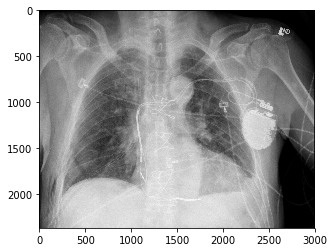

In [7]:
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()


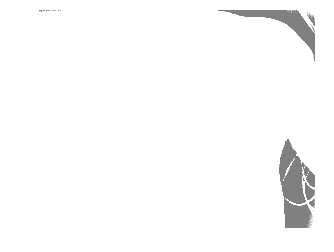

In [10]:
# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)

# Remove axis ticks and labels
plt.axis('off')

# Render the image
plt.show()

###Stack images
Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

In this exercise, we will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: vol[plane, row, col].

Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.


In [12]:
im1 = imageio.imread('images/prost1.dcm')
im2 = imageio.imread('images/prost2.dcm')
im3 = imageio.imread('images/prost3.dcm')

vol = np.stack([im1, im2, im3])
print('Volume dimensions: ', vol.shape)


Volume dimensions:  (3, 384, 384)


###Load volumes
ImageIO's volread() function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

In [13]:
# Load the  directory
vol = imageio.volread('images/paciente')

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 

1/19 files (5.3%)

19/19 files (100.0%)

  Found 1 correct series.


Reading DICOM (loading data): 

19/19  (100.0%)

Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'AcquisitionDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'AcquisitionTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'PatientSize', 'PatientWeight', 'SliceSpacing', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'PixelData', 'shape', 'sampling'])
Shape of image array: (19, 384, 384)
